In this module, we analyze the result of a chemical analysis of wines grown in a particular region in Italy. And the goal is to try to group similar observations together and determine the number of possible clusters. This would help us make predictions and reduce dimensionality.

As we will see there are 13 features for each wine, and if we could group all the wines into, say 3 groups, then it is reducing the 13-dimensional space to a 3-dimensional space.

More specifically we can represent each of our original data points in terms of how far it is from each of these three cluster centers.

The analysis reported the quantities of 13 constituents from 178 wines: alcohol, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, od280/od315 of diluted wines, and proline.

In [14]:
import numpy as numpy 
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [15]:
wine.iloc[:,:3].describe()

,alcohol,malic_acid,ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


There are no missing values. It is worth noting that the attributes are not on the same scale. We will have to scale the data later.

Another way to check for column names and the datatype of each column is to use .info().

In [16]:
wine.info

<bound method DataFrame.info of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  no

In [17]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The summary statistics provide some of the information, while visualization offers a more direct view showing the distribution and the relationship between features.

Here we introduce a plotting function to display histograms along the diagonal and the scatter plots for every pair of attributes off the diagonal, 'scatter_matrix', for the ease of display, let’s show just two features:

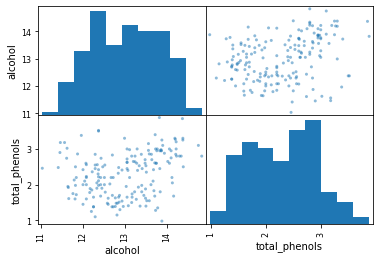

In [18]:
import matplotlib.pyplot as plt
import numpy as numpy 
from pandas.plotting import scatter_matrix

scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

As we don’t know the ground truth, we look into the scatter plots to come up with a reasonable candidate for k, the number of clusters. There seem to be roughly three subgroups. Remember that there are no right or wrong answers for the number of subgroups. In the real world data, rarely do we find clear clusters; but we come up with our best educated guess. For example, in the scatter plot above, there seem to be three subgroups.

No matter whether it is a supervised or unsupervised learning problem, exploratory data analysis (EDA) is essential and strongly recommended before one dives into modeling.

After examining all the pairs of scatter plot, we pick two features to better illustrate the algorithm: alcohol and total_phenols, whose scatterplot also suggests three subclusters

X = wine[['alcohol', 'total_phenols']]

Unlike any supervised learning models, in general, unsupervised machine learning models do not require to split data into training and testing sets since there is no ground truth to validate the model. However, centroid-based algorithms require one pre-processing step because k-means works better on data where each attribute is of similar scales. One way to achieve this is to standardize the data; mathematically:

z = (x - mean) / std

where x is the raw data, mean and std are the average and standard deviation of x, and z is the scaled x such that it is centered at 0 and it has a unit standard deviation. StandardScaler under the sklearn.preprocessing makes it easy:

In [19]:
X = wine[['alcohol', 'total_phenols']] 

#We can look into the object scale, extract the calculated mean and std:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)

print(scale.mean_)
print(scale.scale_)

[13.00061798  2.29511236]
[0.80954291 0.62409056]


The raw alcohol measurements have a mean 13.00 and std 0.81 while total phenols are centered at 2.29 with a std 0.62. Next we can fit to the training data, and transform it.

X_scaled = scale.transform(X)

We show the original (red) and scaled (blue) data in the plot to visualize the effect of scaling. After scaling, the data is centered around (0, 0), and the ranges along x- and y-axis are roughly the same, from -2.5 to 2.5.

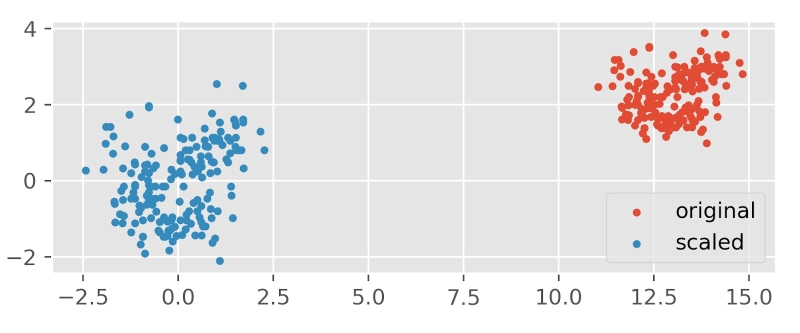

Let’s do a sanity check to see if each feature is centered at 0 and has a std of 1:

In [20]:
X_scaled = scale.transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 7.84141790e-15 -1.95536471e-16]
[1. 1.]


It is a good practice to scale the features before training the model if the algorithms are distance-based. For more details, refer to Importance of Feature Scaling.
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html